In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [81]:
df = pd.read_csv('datos_seguro.csv')
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [82]:
df.describe()

,edad,compra
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


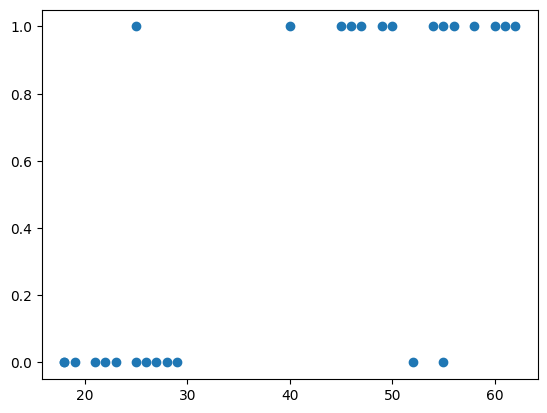

In [83]:
plt.scatter(df['edad'],df['compra'])

In [84]:
X_entrena ,  X_prueba,y_entrena , y_prueba = train_test_split(df[['edad']],df[['compra']],test_size=0.2 )

In [85]:
X_prueba

,edad
4,46
25,54
18,19
2,47
6,55
20,21


In [86]:
modelo = LogisticRegression()
modelo.fit(X_entrena,y_entrena)

/workspaces/se_24_python/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [87]:
datos_nuevos = pd.DataFrame({'edad' : [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]})
datos_nuevos.head()

,edad
0,20
1,25
2,30
3,35
4,40


In [88]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[0.93606523, 0.06393477],
       [0.87166315, 0.12833685],
       [0.75908459, 0.24091541],
       [0.59377422, 0.40622578],
       [0.40408152, 0.59591848],
       [0.23929209, 0.76070791],
       [0.12734484, 0.87265516],
       [0.06340436, 0.93659564],
       [0.03044851, 0.96955149],
       [0.01435959, 0.98564041]])

In [89]:
prob_compra = probabilidades[:,1]
prob_compra

array([0.06393477, 0.12833685, 0.24091541, 0.40622578, 0.59591848,
       0.76070791, 0.87265516, 0.93659564, 0.96955149, 0.98564041])

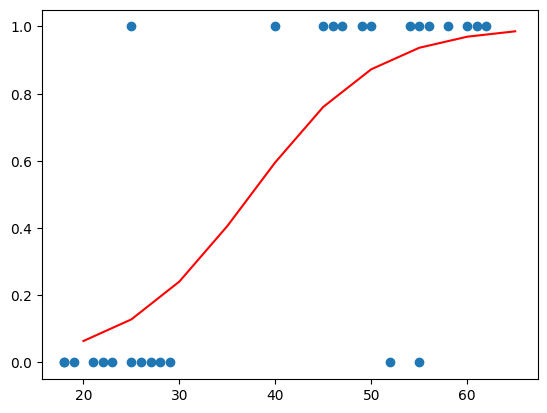

In [90]:
plt.scatter(df['edad'], df['compra'])
plt.plot(datos_nuevos['edad'],prob_compra,color='red')